# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [96]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [97]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [98]:
customers.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


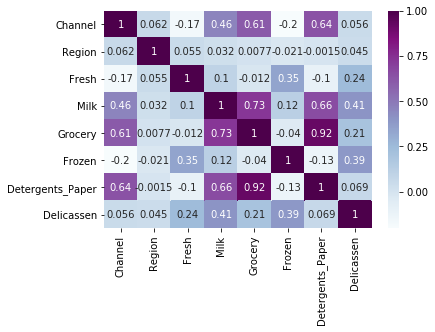

In [99]:
sns.heatmap(customers.corr(),cmap="BuPu",annot=True)
plt.show()
# high correlation channel and Grocery & Detergents_Paper

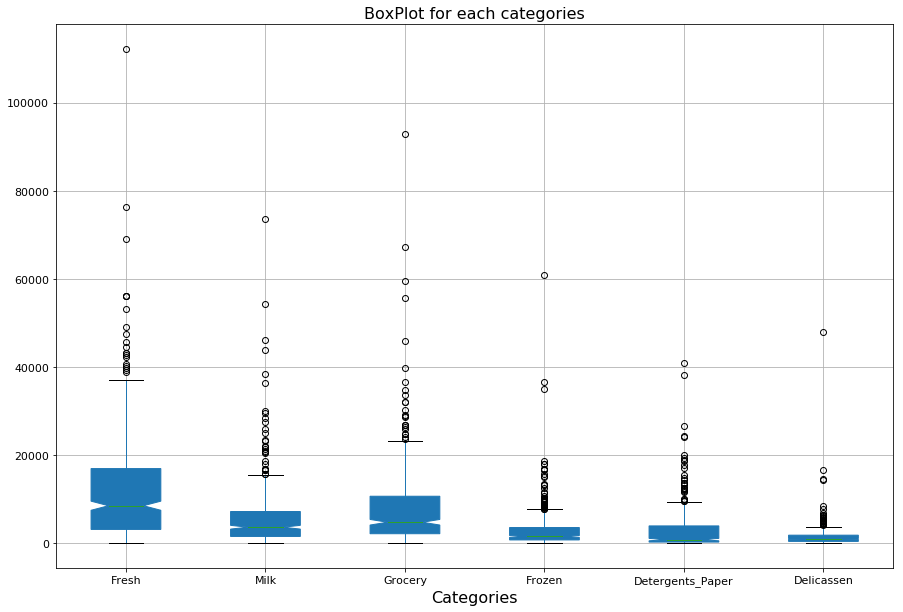

In [100]:
fig, ax = plt.subplots(figsize=(15, 10))
boxplot = customers.boxplot(column=['Fresh', 'Milk', 'Grocery', 'Frozen',
                             'Detergents_Paper','Delicassen'],patch_artist=True, fontsize=11,
                     notch=True,showfliers=True)
plt.title("BoxPlot for each categories",fontsize=16)
plt.xlabel('Categories', fontsize=16)
plt.show()

In [101]:
# Your code here:
customers['Channel'].value_counts(normalize=True) * 100

1    67.727273
2    32.272727
Name: Channel, dtype: float64

In [102]:
# Your observations here
# here the distribution is about 30%~70%, but it's better after removing outliers 

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [103]:
# Your code here
'''def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out
customers = remove_outlier(customers,'Fresh') 
customers = remove_outlier(customers,'Milk') 
customers = remove_outlier(customers,'Grocery') 
customers = remove_outlier(customers,'Frozen') 
customers = remove_outlier(customers,'Detergents_Paper') 
customers = remove_outlier(customers,'Delicassen') '''

"def remove_outlier(df_in, col_name):\n    q1 = df_in[col_name].quantile(0.25)\n    q3 = df_in[col_name].quantile(0.75)\n    iqr = q3-q1 #Interquartile range\n    fence_low  = q1-1.5*iqr\n    fence_high = q3+1.5*iqr\n    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]\n    return df_out\ncustomers = remove_outlier(customers,'Fresh') \ncustomers = remove_outlier(customers,'Milk') \ncustomers = remove_outlier(customers,'Grocery') \ncustomers = remove_outlier(customers,'Frozen') \ncustomers = remove_outlier(customers,'Detergents_Paper') \ncustomers = remove_outlier(customers,'Delicassen') "

In [104]:
# Your comment here
customers.shape

(440, 8)

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [105]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(customers)
customers_scale = scaler.transform(customers)

/Users/Eleonore/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/Eleonore/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [106]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0).fit(customers_scale)

Count the values in `labels`.

In [119]:
# Your code here:
customers['labels'] = kmeans.labels_
customers.labels.value_counts()

0    209
3    126
2     92
1     13
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [108]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5).fit(customers_scale)
customers['labels_DBSCAN'] = dbscan.labels_

Count the values in `labels_DBSCAN`.

In [117]:
# Your code here
customers['labels_DBSCAN'].value_counts()

-1    255
 1    130
 5     22
 4      7
 6      6
 2      5
 7      5
 3      5
 0      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

In [110]:
customers #.iloc[:, 6] 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,labels,labels_DBSCAN
0,2,3,12669,9656,7561,214,2674,1338,3,-1
1,2,3,7057,9810,9568,1762,3293,1776,3,-1
2,2,3,6353,8808,7684,2405,3516,7844,3,-1
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,3,-1
5,2,3,9413,8259,5126,666,1795,1451,3,-1
6,2,3,12126,3199,6975,480,3140,545,3,0
7,2,3,7579,4956,9426,1669,3321,2566,3,-1
8,1,3,5963,3648,6192,425,1716,750,0,1
9,2,3,6006,11093,18881,1159,7425,2098,3,-1


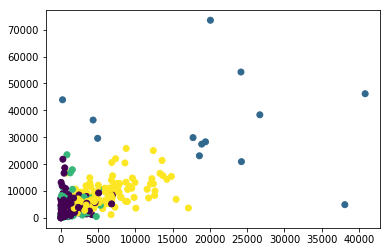

In [111]:
plt.scatter(customers.iloc[:, 6],customers.iloc[:, 3], c=customers['labels'])

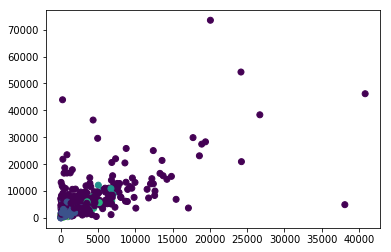

In [112]:
plt.scatter(customers.iloc[:, 6],customers.iloc[:, 3], c=customers['labels_DBSCAN'])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

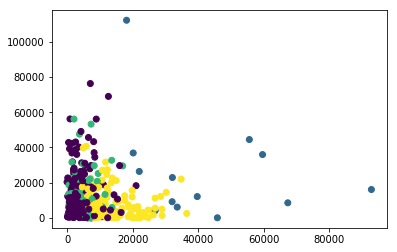

In [113]:
# Your code here:
plt.scatter(customers.iloc[:, 4],customers.iloc[:, 2], c=customers['labels'])

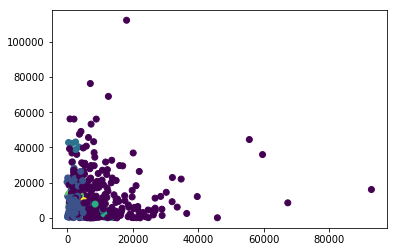

In [114]:
plt.scatter(customers.iloc[:, 4],customers.iloc[:, 2], c=customers['labels_DBSCAN'])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

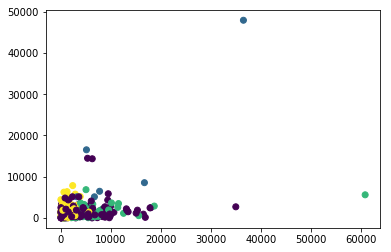

In [115]:
# Your code here:
plt.scatter(customers.iloc[:, 5],customers.iloc[:, 7], c=customers['labels'])

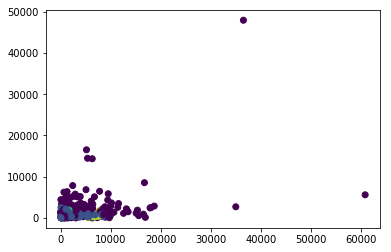

In [116]:
plt.scatter(customers.iloc[:, 5],customers.iloc[:, 7], c=customers['labels_DBSCAN'])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [118]:
# Your code here:
customers.groupby(['labels','labels_DBSCAN']).mean()

Channel    Region         Fresh          Milk  \
labels labels_DBSCAN                                                   
0      -1             1.000000  3.000000  18720.148649   5580.445946   
        1             1.000000  3.000000   9128.823077   1862.438462   
        2             1.000000  3.000000  41446.600000   1421.200000   
1      -1             1.846154  2.615385  25770.769231  35160.384615   
2      -1             1.084746  1.406780  14349.355932   4323.322034   
        5             1.000000  1.000000   9837.863636   1751.863636   
        6             1.000000  1.000000   6823.000000   1943.000000   
        7             1.000000  2.000000   7494.600000   1537.600000   
3      -1             2.000000  2.623853   8569.871560   9235.385321   
        0             2.000000  3.000000  11401.000000   3536.200000   
        3             2.000000  3.000000   2357.200000  10224.800000   
        4             2.000000  3.000000   3068.142857   6095.857143   

                           Grocery       Frozen  Detergents_Paper   Delicassen  
labels labels_DBSCAN                                                            
0      -1              6160.621622  5876.472973       1272.527027  2209.297297  
        1              2423.530769  2131.430769        496.576923   741.946154  
        2              2167.600000  1276.400000        416.200000   784.800000  
1      -1             41977.384615  6844.538462      19867.384615  7880.307692  
2      -1              5268.338983  4893.576271       1165.305085  1477.067797  
        5              2161.681818  1513.181818        333.954545   669.045455  
        6              2372.666667  6780.333333        386.500000   613.666667  
        7              3383.000000  2575.400000        227.400000   941.000000  
3      -1             14826.504587  1423.550459       6328.330275  1627.899083  
        0              6729.000000   720.200000       3561.000000   258.200000  
        3             11862.800000   609.600000       5780.000000   572.800000  
        4             10355.000000   994.000000       4675.571429  1826.428571

Which algorithm appears to perform better?

In [ ]:
# Your observations here


# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here